In [2]:
from IPython.display import HTML

In [99]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [100]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels
from scipy import stats
from pingouin import pairwise_ttests #this is for performing the pairwise tests
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

# Testing Sites


In [6]:
testing_sites_df =  pd.read_csv('testingsites.csv')

In [7]:
testing_sites_df.drop(columns = ['Owner Name','Phone','Website','Operational Hours','Vehicle Capacity','CreationDate','Drive-through','Appointment Only','Referral Required','Call first','Virtual/Telehealth Screening','Local Health Department URL','Vehicle Required','Offering same-day diagnostic (not antibody) results','Offering Take-Home Test','Status Color'], inplace = True)
testing_sites_df.drop(columns = ['Public Form Submission','Minimum Age','Wheelchair accessibility ','Accessibility Support'], inplace = True)

In [8]:

testing_sites_df['county']= testing_sites_df['County']
testing_sites_df
testing_sites_df.sort_values(by ='County')


,Name of Facility,Full Address,Municipality,Owner Type,Daily Testing Capacity,Services Offered,State or Territory,County,Testing Start Date,Testing End Date,Kind of test,Processing location,Facility Type,x,y,county
8858,CHC Enfield,"5 North Main Street, Enfield, CT",Enfield,FQHC,NaN,COVID-19 testing only (no screening),Connecticut,Hartford,11/3/2020,11/3/2020,Molecular,Not Specified,Mobile/Pop-up (short-term event),-8.082311e+06,5160794.778,Hartford
6809,ALBERTSONS 184,"6560 SOUTH FEDERAL WAY, Boise ID, 83716",Boise,Private,NaN,COVID-19 screening and testing,Idaho,Ada,8/16/2020,NaN,Molecular,Offsite Lab,Retail/Pharmacy,-1.293014e+07,5394986.099,Ada
4850,Family Medicine Health Center-Kuna,"708 E Wythe Creek Ct Ste 103, Kuna, ID 83634-5005",Kuna,FQHC,NaN,COVID-19 screening and testing,Idaho,Ada,NaN,NaN,Molecular,Offsite Lab,Clinic/Health Center,-1.295815e+07,5386506.524,Ada
6802,ALBERTSONS 169,"909 EAST PARKCENTER BLVD, Boise ID, 83706",Boise,Private,NaN,COVID-19 screening and testing,Idaho,Ada,8/16/2020,NaN,Molecular,Offsite Lab,Retail/Pharmacy,-1.293219e+07,5401123.670,Ada
3895,Rite Aid/Project Baseline Testing Site,"3250 S Eagle Road Meridian, ID",Meridian,Public-Private Partnership,NaN,COVID-19 screening and testing,Idaho,Ada,NaN,NaN,Molecular,Offsite Lab,Retail/Pharmacy,-1.295245e+07,5399916.908,Ada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10788,CIC Health Middlebury,"154 Creek Rd, Middlebury, VT 05753, USA",Middlebury,Public-Private Partnership,NaN,COVID-19 testing only (no screening),Vermont,NaN,NaN,NaN,Molecular,Offsite Lab,Indoor Non-medical Facility,-8.144216e+06,5465912.348,NaN
10789,CIC Health Brattleboro,"17 Belmont Ave, Brattleboro, VT 05301, USA",Brattleboro,Public-Private Partnership,NaN,COVID-19 testing only (no screening),Vermont,NaN,NaN,NaN,Molecular,Offsite Lab,Indoor Non-medical Facility,-8.077923e+06,5288098.494,NaN
10790,CIC Health Newton,"Riverside MBTA Station Parking Lot, 367 Grove ...",Newton,Public-Private Partnership,NaN,COVID-19 testing only (no screening),Massachusetts,NaN,NaN,NaN,Molecular,Offsite Lab,Indoor Non-medical Facility,-7.931803e+06,5211651.232,NaN
10791,CIC Health Cambridge,"Ground Floor, 245 Main St, Cambridge, MA 02142...",Cambridge,Public-Private Partnership,NaN,COVID-19 testing only (no screening),Massachusetts,NaN,NaN,NaN,Molecular,Offsite Lab,Indoor Non-medical Facility,-7.913119e+06,5215443.009,NaN


In [9]:
testing_sites_df['county_states']= testing_sites_df['county'] + ' , ' + testing_sites_df['State or Territory']
testing_sites_df

,Name of Facility,Full Address,Municipality,Owner Type,Daily Testing Capacity,Services Offered,State or Territory,County,Testing Start Date,Testing End Date,Kind of test,Processing location,Facility Type,x,y,county,county_states
0,Wheeling Hospital/WVU Hospitals Offsite COVID-...,"Wheeling Park (Near Ice Rink), 1801 National R...",Wheeling,Municipal,NaN,COVID-19 testing only (no screening),West Virginia,Ohio,NaN,NaN,Molecular,Lab (location not specified),Hospital,-8.979782e+06,4874576.993,Ohio,"Ohio , West Virginia"
1,Middleton Family Medicine,"147 South Main Street Middleton, MA 01949",Middleton,Other,NaN,COVID-19 testing only (no screening),Massachusetts,Essex,NaN,NaN,Molecular,Lab (location not specified),Clinic/Health Center,-7.904520e+06,5248669.198,Essex,"Essex , Massachusetts"
2,Central Outreach Wellness Center,"127 Anderson Street, Suite 101 Timber Court Bu...",Pittsburgh,Nonprofit,NaN,COVID-19 screening and testing,Pennsylvania,Allegheny,NaN,NaN,Molecular,Lab (location not specified),Outdoor/Tent,-8.905650e+06,4931349.163,Allegheny,"Allegheny , Pennsylvania"
3,Anthony Wayne Recreation Area,"Palisades Int Interstate Parkway, Exit 17, Bea...",Bear Mountain,State/Territory,NaN,COVID-19 testing only (no screening),New York,Orange,NaN,NaN,Molecular,Lab (location not specified),NaN,-8.240723e+06,5056547.051,Orange,"Orange , New York"
4,Wexford Health + Wellness Pavilion (Allegheny ...,"12311 Perry Highway Wexford, PA 15090",Wexford,Private,NaN,COVID-19 testing only (no screening),Pennsylvania,Allegheny,NaN,NaN,Molecular,Lab (location not specified),Clinic/Health Center,-8.912678e+06,4958745.420,Allegheny,"Allegheny , Pennsylvania"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10799,Kahoka Christian Church,"MO-81, Kahoka, MO 63445",Kahoka,State/Territory,NaN,COVID-19 testing only (no screening),Missouri,Clark,12/7/2020,12/7/2020,Molecular,Offsite Lab,Mobile/Pop-up (short-term event),-1.021017e+07,4927212.539,Clark,"Clark , Missouri"
10800,Marshall County Health Department,"513 6th Street Moundsville, WV 26041",Moundsville,Municipal,NaN,COVID-19 testing only (no screening),West Virginia,Marshall,12/14/2020,12/18/2020,Molecular,Offsite Lab,Mobile/Pop-up (short-term event),-8.988640e+06,4854205.481,Marshall,"Marshall , West Virginia"
10801,Premier Urgent Care,"1301 East 47th Street, Chicago, Il 60653",Chicago,Public-Private Partnership,30.0,COVID-19 screening and testing,Illinois,Cook,10/1/2020,3/31/2021,"Molecular, Antibody, and Antigen",More than one processing location,Urgent Care,-9.751765e+06,5132563.259,Cook,"Cook , Illinois"
10802,The Word Church,"18909 South Miles Road Warrensville Heights, O...",Cleveland,State/Territory,NaN,COVID-19 testing only (no screening),Ohio,Cuyahoga,12/13/2020,12/13/2020,Molecular,Offsite Lab,Medical Center,-9.077688e+06,5076056.620,Cuyahoga,"Cuyahoga , Ohio"


In [10]:
_ = testing_sites_df['county_states'].unique
_

<bound method Series.unique of 0             Ohio , West Virginia
1            Essex , Massachusetts
2         Allegheny , Pennsylvania
3                Orange , New York
4         Allegheny , Pennsylvania
                   ...            
10799             Clark , Missouri
10800     Marshall , West Virginia
10801              Cook , Illinois
10802              Cuyahoga , Ohio
10803    Grand Traverse , Michigan
Name: county_states, Length: 10804, dtype: object>

# Covid

In [125]:
Covid_data = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")

In [126]:
Covid_data['mortality'] = Covid_data['deaths']/Covid_data['cases']
Covid_data.tail()

,date,county,state,fips,cases,deaths,mortality
991912,2021-02-02,Sweetwater,Wyoming,56037.0,3510,33.0,0.009402
991913,2021-02-02,Teton,Wyoming,56039.0,3151,7.0,0.002222
991914,2021-02-02,Uinta,Wyoming,56041.0,1975,12.0,0.006076
991915,2021-02-02,Washakie,Wyoming,56043.0,867,26.0,0.029988
991916,2021-02-02,Weston,Wyoming,56045.0,611,5.0,0.008183


# Merge covid testing sites

In [13]:
testing_sites_covid = Covid_data.merge(testing_sites_df,
    how='inner',
    on = 'county'
)

testing_sites_covid

,date,county,state,fips,cases,deaths,mortality,Name of Facility,Full Address,Municipality,...,State or Territory,County,Testing Start Date,Testing End Date,Kind of test,Processing location,Facility Type,x,y,county_states
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0,0.0,the Everett Clinic Gunderson Building,"3927 Rucker Avenue Everett, WA 98201",Everett,...,Washington,Snohomish,NaN,NaN,Molecular,Lab (location not specified),NaN,-13604420.27,6101023.489,"Snohomish , Washington"
1,2020-01-21,Snohomish,Washington,53061.0,1,0.0,0.0,Everett Clinic Marysville,"4420 76th Street NE Marysville, WA 98270",Marysville,...,Washington,Snohomish,NaN,NaN,Molecular,Offsite Lab,Clinic/Health Center,-13600012.94,6117511.584,"Snohomish , Washington"
2,2020-01-21,Snohomish,Washington,53061.0,1,0.0,0.0,Everett Clinic Harbour Pointe (Mukilteo),"4410 106th Street SW Mukilteo, WA 98275",Harbour Pointe (Mukilteo),...,Washington,Snohomish,NaN,NaN,Molecular,Lab (location not specified),NaN,-13613643.29,6090490.634,"Snohomish , Washington"
3,2020-01-21,Snohomish,Washington,53061.0,1,0.0,0.0,Everett Clinic Smokey Point,"2901 174th Street NE Marysville, WA 98271",Smokey Point,...,Washington,Snohomish,NaN,NaN,Molecular,Offsite Lab,Clinic/Health Center,-13602246.92,6132593.962,"Snohomish , Washington"
4,2020-01-21,Snohomish,Washington,53061.0,1,0.0,0.0,Swedish Edmonds Campus,"21601 76th Ave. W. Edmonds, WA 98026",Edmonds,...,Washington,Snohomish,NaN,NaN,Molecular,Lab (location not specified),NaN,-13618179.88,6074175.770,"Snohomish , Washington"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13099030,2021-01-29,Hayes,Nebraska,31085.0,58,0.0,0.0,Hayes Center - Hayes Center High School,"501 Troth St, Hayes Center NE 69032",Hayes Center,...,Nebraska,Hayes,NaN,NaN,Molecular,Offsite Lab,Outdoor/Tent,-11245261.71,4940499.842,"Hayes , Nebraska"
13099031,2021-01-30,Hayes,Nebraska,31085.0,58,0.0,0.0,Hayes Center High School,"501 Troth St, Hayes Center NE 69032",Hayes Center,...,Nebraska,Hayes,10/12/2020,10/12/2020,Molecular,Offsite Lab,Mobile/Pop-up (short-term event),-11245261.71,4940499.842,"Hayes , Nebraska"
13099032,2021-01-30,Hayes,Nebraska,31085.0,58,0.0,0.0,Hayes Center - Hayes Center High School,"501 Troth St, Hayes Center NE 69032",Hayes Center,...,Nebraska,Hayes,NaN,NaN,Molecular,Offsite Lab,Outdoor/Tent,-11245261.71,4940499.842,"Hayes , Nebraska"
13099033,2021-01-31,Hayes,Nebraska,31085.0,58,0.0,0.0,Hayes Center High School,"501 Troth St, Hayes Center NE 69032",Hayes Center,...,Nebraska,Hayes,10/12/2020,10/12/2020,Molecular,Offsite Lab,Mobile/Pop-up (short-term event),-11245261.71,4940499.842,"Hayes , Nebraska"


In [ ]:
#  mort_county.corr()[['asthma_value_times_count', 'deaths']]

# Asthma

In [127]:
asthma = pd.read_csv('500_Cities__Current_asthma_among_adults_aged___18_years.csv')

In [128]:
asthma['state'] = asthma['StateDesc']
asthma['asthma_value_times_count'] = (asthma['Data_Value'] * asthma['PopulationCount'])/100
asthma['asthma_value_times_count']

0         528.612
1        5524.416
2         478.986
3         359.048
4         244.664
5         602.217
6         533.088
7         129.114
8         208.284
9         129.642
10        199.088
11        430.248
12       6983.556
13        301.770
14        858.104
15        477.752
16        122.636
17        486.128
18        298.067
19        448.128
20        565.785
21        521.489
22        267.696
23        565.779
24        545.008
25        315.375
26        538.160
27        152.724
28        195.306
29        378.990
           ...   
28976     462.580
28977    6506.056
28978     655.820
28979     792.820
28980     687.810
28981     170.655
28982     399.000
28983     375.800
28984     363.900
28985     142.784
28986     311.328
28987         NaN
28988      94.554
28989     447.282
28990      98.560
28991      87.045
28992     223.479
28993    6576.774
28994     433.100
28995     575.920
28996     674.432
28997     378.945
28998     491.470
28999     313.720
29000     

In [61]:
# asthma.drop(columns = ['Category','UniqueID','Measure','Short_Question_Text','Data_Value_Footnote','CategoryID','MeasureId','CityFIPS','TractFIPS'], inplace = True)
asthma.columns

Index(['Year', 'StateAbbr', 'StateDesc', 'CityName', 'GeographicLevel',
       'DataSource', 'Category', 'UniqueID', 'Measure', 'Data_Value_Unit',
       'DataValueTypeID', 'Data_Value_Type', 'Data_Value',
       'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'PopulationCount',
       'GeoLocation', 'CategoryID', 'MeasureId', 'CityFIPS', 'TractFIPS',
       'Short_Question_Text', 'state', 'asthma_value_times_count'],
      dtype='object')

In [129]:
'''
changed aggfunc to mean because were dealing with percentage value, 
sum misrepresented the data
'''

asthma1 = asthma.groupby(['state']).mean()
asthma_state_count = asthma1['asthma_value_times_count']
asthma1

,Year,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount,CityFIPS,TractFIPS,asthma_value_times_count
state,,,,,,,,
Alabama,2017.0,11.425490,10.760224,12.210084,7.620821e+03,1.383106e+05,1.092529e+09,9.189002e+02
Alaska,2017.0,9.040351,8.621053,9.522807,1.535926e+04,2.030000e+05,2.020002e+09,1.379812e+03
Arizona,2017.0,10.344531,9.794141,10.979785,1.099551e+04,4.530350e+05,4.014536e+09,1.181525e+03
Arkansas,2017.0,9.733594,9.216406,10.329687,1.114484e+04,5.382832e+05,5.111562e+09,1.111260e+03
California,2017.0,8.897829,8.427422,9.427933,1.196123e+04,6.480528e+05,6.054179e+09,1.081963e+03
Colorado,2017.0,9.454213,8.948455,10.052247,1.023229e+04,8.280779e+05,8.040081e+09,1.001540e+03
Connecticut,2017.0,10.980085,10.433051,11.602542,1.107831e+04,9.456635e+05,9.003933e+09,1.199748e+03
Delaware,2017.0,12.065385,11.392308,12.830769,8.175115e+03,1.077580e+06,1.000300e+10,9.842651e+02
District of C,2017.0,10.266111,9.639444,11.047222,9.973309e+03,1.150000e+06,1.100101e+10,1.003154e+03


In [130]:
#putting years in 1 column before merge
#didn't use this df because we have another thats grouped by state
asthma_premerge = asthma[['StateAbbr','Year','Data_Value']]


# Census -people with insurance

In [17]:

census_insurance = pd.read_csv('https://www2.census.gov/programs-surveys/demo/datasets/income-poverty/time-series/data-extracts/2018/cps-asec-bridge-file/hhpub18.csv')
census_insurance.columns
#HCOV NOW_HCOV 
# HTML(filename='www.census.gov/data/tables/time-series/demo/health-insurance/historical-series/hib.html')

Index(['H_IDNUM', 'GEREG', 'GESTFIPS', 'GEDIV', 'HRHTYPE', 'HEFAMINC',
       'H_MONTH', 'H_YEAR', 'H_TENURE', 'H_HHNUM',
       ...
       'THCHCARE_VAL', 'THPROP_VAL', 'GTCBSA', 'GTCO', 'GTCBSAST', 'GTCBSASZ',
       'GTCSA', 'GTMETSTA', 'GTINDVPC', 'MMYY'],
      dtype='object', length=134)

# Merging covid and asthma data

In [131]:
# Covid_data & asthma
var_of_interest= ['confirmed_deaths','confirmed_cases']

In [67]:
asthma1.shape

(52, 8)

In [12]:
Covid_data.shape

(991917, 7)

In [132]:
covid_asthma = pd.merge(asthma1,Covid_data,
    how="left",                      
    left_on = ['state'],
    right_on = ['state']) 
# covid_asthma.drop('United States', axis = 0)
covasdrop= ['fips','Low_Confidence_Limit','High_Confidence_Limit','CityFIPS','TractFIPS','Year','asthma_value_times_count','PopulationCount']
covid_asthma = covid_asthma.drop(columns = covasdrop)
covid_asthma = covid_asthma.rename(columns={'Data_Value':'perc pop with asthma','mortality':'covid mortality'})

In [133]:
asthmamort = covid_asthma.groupby('county').mean()
asthmamort.to_csv('asthmamort.csv')

In [134]:
covid_asthma.corr()[['perc pop with asthma', 'deaths']]

,perc pop with asthma,deaths
perc pop with asthma,1.000000,0.013183
cases,-0.019516,0.737719
deaths,0.013183,1.000000
covid mortality,0.026435,0.012484


# AQI

In [24]:
# #not updated through 12/2020
# with open('waqi-covid19-airqualitydata-2020.csv') as AQI:
#     AQI_older = pd.read_csv(AQI)
# AQI_older.head()


In [25]:
# with open('waqi-covid19-airqualitydata-2020.csv') as AQI:
#     AQI_old = pd.read_csv(AQI)
# AQI_old.head()


In [71]:
#this takes us to a document where we need to delete the first five rows bc it's just information 
#updated currently woohoo!
AQI = pd.read_excel('AQI_US.xlsx')
AQI.head()
AQI = AQI.sort_values('Date', ascending = False)
AQIbig6list=['so2','pm10','pm25','co','no2','o3']
AQI_big6df= AQI[AQI['Specie'].isin(AQIbig6list)]


# aqigroup=['City','Specie']
# AQI_average_values = AQI_big6df.groupby(by = aqigroup).mean()
# AQI.to_csv('AQI.csv')

In [74]:
'''
Replacing NY buroughs with 'New York' for the merge with city df
'''

NYBur={
    'Manhattan':'New York', 'Brooklyn':'New York','Queens':'New York', 
    'Staten Island':'New York', 'The Bronx':'New York'
}
AQI_big6df['City'] = AQI_big6df['City'].replace(to_replace = NYBur)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [80]:
AQI_average_values = pd.pivot_table(AQI_big6df, index = ['City'], values = 'median', columns = 'Specie',aggfunc = 'mean')


In [81]:


AQI_average_values['state_name'] = ['New Mexico','Georgia','Texas',
'Maryland','Idaho','Massachusetts', 'North Carolina','Illinois','South Carolina','Ohio','Texas','Colorado','Michigan','Texas',
'Indiana','California','Connecticut','Hawaii','Texas','Indiana','Mississippi','Florida',
'Nevada','Arkansas','California','Wisconsin','Tennessee','Florida','Wisconsin','Tennessee',
'New York','California','Oklahoma','Nebraska','Pennsylvania','Arizona','Oregon',
'Rhode Island','North Carolina','Virginia','California','Minnesota','Oregon','Utah',
'Texas','California','California','California','Washington','Illinois','Florida','Arizona','Maryland']
AQI_average_values

Specie,co,no2,o3,pm10,pm25,so2,state_name
City,,,,,,,
Albuquerque,1.832391,6.692545,29.788175,18.699229,24.411311,1.511667,New Mexico
Atlanta,2.841645,6.257326,19.140206,15.107969,35.149100,0.512658,Georgia
Austin,NaN,3.329897,20.808808,NaN,34.973890,0.410714,Texas
Baltimore,NaN,8.650129,21.242416,11.718579,30.686375,1.695902,Maryland
Boise,2.930848,8.005656,20.900771,19.177835,33.064433,0.740000,Idaho
Boston,2.328021,5.281491,22.412596,NaN,27.079692,1.500000,Massachusetts
Charlotte,0.890909,NaN,20.126221,11.860215,30.637532,1.500000,North Carolina
Chicago,2.591599,7.649731,23.569409,14.219512,32.673522,0.434098,Illinois
Columbia,NaN,NaN,NaN,NaN,36.890173,1.500000,South Carolina


In [82]:
AQI_average_values['City_state'] = AQI_average_values.index + ", " + AQI_average_values['state_name']

# Merging AQI with  city

Problem to overcome in the merge is that the AQI data geolocates through country and city while the covid_asthma dataset geolocates through state and county. How can we make a new column with only county or city or state for the dataset that lacks it?

We want to create a function that will sort the cities into the state

In [83]:
us_cities = pd.read_csv('uscities.csv')
us_cities = us_cities.rename(columns={'city':'City'})
us_cities

,City,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220,10715.0,polygon,False,True,America/New_York,1,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807,3276.0,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8373,-87.6862,8604203,4574.0,polygon,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7839,-80.2102,6445545,5019.0,polygon,False,True,America/New_York,1,33129 33125 33126 33127 33128 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7936,-96.7662,5743938,1526.0,polygon,False,True,America/Chicago,1,75287 75098 75233 75254 75251 75252 75253 7503...,1840019440
5,Philadelphia,Philadelphia,PA,Pennsylvania,42101,Philadelphia,40.0077,-75.1339,5649300,4554.0,polygon,False,True,America/New_York,1,19154 19151 19150 19153 19152 19102 19103 1910...,1840000673
6,Houston,Houston,TX,Texas,48201,Harris,29.7863,-95.3889,5464251,1399.0,polygon,False,True,America/Chicago,1,77069 77068 77061 77060 77063 77062 77065 7706...,1840020925
7,Atlanta,Atlanta,GA,Georgia,13121,Fulton,33.7627,-84.4224,5449398,1441.0,polygon,False,True,America/New_York,1,30334 30331 30332 30309 30308 30305 30307 3030...,1840013660
8,Washington,Washington,DC,District of Columbia,11001,District of Columbia,38.9047,-77.0163,5379184,4457.0,polygon,False,True,America/New_York,1,20010 20011 20012 20015 20228 20520 20307 2041...,1840006060
9,Boston,Boston,MA,Massachusetts,25025,Suffolk,42.3188,-71.0846,4688346,5532.0,polygon,False,True,America/New_York,1,02120 02121 02122 02124 02125 02126 02127 0212...,1840000455


In [84]:
us_cities['city_state'] = us_cities['City'] + ", " + us_cities['state_name']

In [85]:
aqi_city = AQI_average_values.merge(us_cities,
    how="left",                      
    left_on = ['City_state'],
    right_on = ['city_state']) 
aqi_city.head()

,co,no2,o3,pm10,pm25,so2,state_name_x,City_state,City,city_ascii,...,population,density,source,military,incorporated,timezone,ranking,zips,id,city_state
0,1.832391,6.692545,29.788175,18.699229,24.411311,1.511667,New Mexico,"Albuquerque, New Mexico",Albuquerque,Albuquerque,...,761195.0,1155.0,polygon,False,True,America/Denver,2.0,87121 87120 87123 87112 87113 87110 87111 8711...,1.840019e+09,"Albuquerque, New Mexico"
1,2.841645,6.257326,19.140206,15.107969,35.149100,0.512658,Georgia,"Atlanta, Georgia",Atlanta,Atlanta,...,5449398.0,1441.0,polygon,False,True,America/New_York,1.0,30334 30331 30332 30309 30308 30305 30307 3030...,1.840014e+09,"Atlanta, Georgia"
2,NaN,3.329897,20.808808,NaN,34.973890,0.410714,Texas,"Austin, Texas",Austin,Austin,...,1687311.0,1181.0,polygon,False,True,America/Chicago,1.0,78749 78748 78741 78742 78745 78744 78747 7874...,1.840020e+09,"Austin, Texas"
3,NaN,8.650129,21.242416,11.718579,30.686375,1.695902,Maryland,"Baltimore, Maryland",Baltimore,Baltimore,...,2106068.0,2830.0,polygon,False,True,America/New_York,1.0,21218 21211 21210 21213 21212 21215 21214 2121...,1.840002e+09,"Baltimore, Maryland"
4,2.930848,8.005656,20.900771,19.177835,33.064433,0.740000,Idaho,"Boise, Idaho",Boise,Boise,...,389280.0,1056.0,polygon,False,True,America/Boise,2.0,83703 83702 83705 83704 83709 83716 83706 8371...,1.840027e+09,"Boise, Idaho"


In [86]:
'''
dropping columns and renaming for clarity before merge
'''

aqicitydrop = ['source', 'military', 'incorporated', 'timezone','lat', 'lng','county_fips','City', 'ranking', 'zips','id','state_id','city_ascii']
aqi_city = aqi_city.drop(columns= aqicitydrop)
# aqi_city = aqi_city.rename(columns={'state_name':'state','county_name':'county'})


In [26]:
us_cities

,City,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id,city_state
0,New York,New York,NY,New York,36061,New York,40.6943,-73.9249,18713220,10715.0,polygon,False,True,America/New_York,1,11229 11226 11225 11224 11222 11221 11220 1138...,1840034016,"New York, New York"
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1139,-118.4068,12750807,3276.0,polygon,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90037 90031 9000...,1840020491,"Los Angeles, California"
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8373,-87.6862,8604203,4574.0,polygon,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494,"Chicago, Illinois"
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7839,-80.2102,6445545,5019.0,polygon,False,True,America/New_York,1,33129 33125 33126 33127 33128 33149 33144 3314...,1840015149,"Miami, Florida"
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7936,-96.7662,5743938,1526.0,polygon,False,True,America/Chicago,1,75287 75098 75233 75254 75251 75252 75253 7503...,1840019440,"Dallas, Texas"
5,Philadelphia,Philadelphia,PA,Pennsylvania,42101,Philadelphia,40.0077,-75.1339,5649300,4554.0,polygon,False,True,America/New_York,1,19154 19151 19150 19153 19152 19102 19103 1910...,1840000673,"Philadelphia, Pennsylvania"
6,Houston,Houston,TX,Texas,48201,Harris,29.7863,-95.3889,5464251,1399.0,polygon,False,True,America/Chicago,1,77069 77068 77061 77060 77063 77062 77065 7706...,1840020925,"Houston, Texas"
7,Atlanta,Atlanta,GA,Georgia,13121,Fulton,33.7627,-84.4224,5449398,1441.0,polygon,False,True,America/New_York,1,30334 30331 30332 30309 30308 30305 30307 3030...,1840013660,"Atlanta, Georgia"
8,Washington,Washington,DC,District of Columbia,11001,District of Columbia,38.9047,-77.0163,5379184,4457.0,polygon,False,True,America/New_York,1,20010 20011 20012 20015 20228 20520 20307 2041...,1840006060,"Washington, District of Columbia"
9,Boston,Boston,MA,Massachusetts,25025,Suffolk,42.3188,-71.0846,4688346,5532.0,polygon,False,True,America/New_York,1,02120 02121 02122 02124 02125 02126 02127 0212...,1840000455,"Boston, Massachusetts"


# Merging Covid/Asthma/AQI

1. aqi cityies have incorrect counties

In [87]:
aqi_city.drop(columns = ['state_name_y','city_state'], inplace = True)

In [88]:
aqi_city = aqi_city.rename(columns = {'county_name':'county'})
aqi_city.head()

,co,no2,o3,pm10,pm25,so2,state_name_x,City_state,county,population,density
0,1.832391,6.692545,29.788175,18.699229,24.411311,1.511667,New Mexico,"Albuquerque, New Mexico",Bernalillo,761195.0,1155.0
1,2.841645,6.257326,19.140206,15.107969,35.149100,0.512658,Georgia,"Atlanta, Georgia",Fulton,5449398.0,1441.0
2,NaN,3.329897,20.808808,NaN,34.973890,0.410714,Texas,"Austin, Texas",Travis,1687311.0,1181.0
3,NaN,8.650129,21.242416,11.718579,30.686375,1.695902,Maryland,"Baltimore, Maryland",Baltimore,2106068.0,2830.0
4,2.930848,8.005656,20.900771,19.177835,33.064433,0.740000,Idaho,"Boise, Idaho",Ada,389280.0,1056.0


In [89]:
aqi_city['county_state'] = aqi_city['county'] + ", " + aqi_city['state_name_x']
aqi_city

,co,no2,o3,pm10,pm25,so2,state_name_x,City_state,county,population,density,county_state
0,1.832391,6.692545,29.788175,18.699229,24.411311,1.511667,New Mexico,"Albuquerque, New Mexico",Bernalillo,761195.0,1155.0,"Bernalillo, New Mexico"
1,2.841645,6.257326,19.140206,15.107969,35.149100,0.512658,Georgia,"Atlanta, Georgia",Fulton,5449398.0,1441.0,"Fulton, Georgia"
2,NaN,3.329897,20.808808,NaN,34.973890,0.410714,Texas,"Austin, Texas",Travis,1687311.0,1181.0,"Travis, Texas"
3,NaN,8.650129,21.242416,11.718579,30.686375,1.695902,Maryland,"Baltimore, Maryland",Baltimore,2106068.0,2830.0,"Baltimore, Maryland"
4,2.930848,8.005656,20.900771,19.177835,33.064433,0.740000,Idaho,"Boise, Idaho",Ada,389280.0,1056.0,"Ada, Idaho"
5,2.328021,5.281491,22.412596,NaN,27.079692,1.500000,Massachusetts,"Boston, Massachusetts",Suffolk,4688346.0,5532.0,"Suffolk, Massachusetts"
6,0.890909,NaN,20.126221,11.860215,30.637532,1.500000,North Carolina,"Charlotte, North Carolina",Mecklenburg,1512923.0,1113.0,"Mecklenburg, North Carolina"
7,2.591599,7.649731,23.569409,14.219512,32.673522,0.434098,Illinois,"Chicago, Illinois",Cook,8604203.0,4574.0,"Cook, Illinois"
8,NaN,NaN,NaN,NaN,36.890173,1.500000,South Carolina,"Columbia, South Carolina",Richland,560041.0,373.0,"Richland, South Carolina"
9,2.441714,7.434961,27.050442,NaN,29.125964,2.340000,Ohio,"Columbus, Ohio",Franklin,1562009.0,1582.0,"Franklin, Ohio"


In [135]:
#Dictionary of Dates 
dict_dates = {'2020-03-15','2020-04-15','2020-05-15','2020-06-15','2020-07-15','2020-08-15','2020-09-15','2020-10-15','2020-11-15','2020-12-15','2021-01-15'
}

In [136]:
covid_asthma = covid_asthma[covid_asthma['date'].isin(dict_dates)]
covid_asthma['county_state'] = covid_asthma['county'] + ", " + covid_asthma['state']
covid_asthma

,state,perc pop with asthma,date,county,cases,deaths,covid mortality,county_state
11,Alabama,11.425490,2020-03-15,Baldwin,1.0,0.0,0.000000,"Baldwin, Alabama"
12,Alabama,11.425490,2020-03-15,Elmore,1.0,0.0,0.000000,"Elmore, Alabama"
13,Alabama,11.425490,2020-03-15,Jefferson,13.0,0.0,0.000000,"Jefferson, Alabama"
14,Alabama,11.425490,2020-03-15,Lee,1.0,0.0,0.000000,"Lee, Alabama"
15,Alabama,11.425490,2020-03-15,Limestone,1.0,0.0,0.000000,"Limestone, Alabama"
16,Alabama,11.425490,2020-03-15,Montgomery,1.0,0.0,0.000000,"Montgomery, Alabama"
17,Alabama,11.425490,2020-03-15,Shelby,2.0,0.0,0.000000,"Shelby, Alabama"
18,Alabama,11.425490,2020-03-15,Tuscaloosa,3.0,0.0,0.000000,"Tuscaloosa, Alabama"
1459,Alabama,11.425490,2020-04-15,Autauga,25.0,1.0,0.040000,"Autauga, Alabama"
1460,Alabama,11.425490,2020-04-15,Baldwin,98.0,2.0,0.020408,"Baldwin, Alabama"


In [137]:
#covids_asthma = covid_asthma.dropna(inplace = True)
covid_asthma.isnull().any()

state                   False
perc pop with asthma    False
date                    False
county                  False
cases                   False
deaths                  False
covid mortality         False
county_state            False
dtype: bool

In [138]:
covid_asthma['perc pop with asthma'] = round(covid_asthma['perc pop with asthma'],4)
covid_asthma['covid mortality'] = round(covid_asthma['covid mortality'],4)

In [31]:
aqi_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 52
Data columns (total 12 columns):
co              41 non-null float64
no2             41 non-null float64
o3              52 non-null float64
pm10            29 non-null float64
pm25            53 non-null float64
so2             44 non-null float64
state_name_x    53 non-null object
City_state      53 non-null object
county          50 non-null object
population      50 non-null float64
density         50 non-null float64
county_state    50 non-null object
dtypes: float64(8), object(4)
memory usage: 5.4+ KB


In [32]:
master1 = pd.merge(covid_asthma,aqi_city,
    how="inner",                      
    left_on = ['county_state'],
    right_on = ['county_state']
)
master1['asthma population']= master1['perc pop with asthma'] * master1['population']
master1

,state,perc pop with asthma,date,county_x,cases,deaths,covid mortality,county_state,co,no2,o3,pm10,pm25,so2,state_name_x,City_state,county_y,population,density,asthma population
0,Arizona,10.344531,2021-01-29,Maricopa,468090.0,7400.0,0.015809,"Maricopa, Arizona",4.621594,9.324679,19.580463,22.863753,32.012853,0.179946,Arizona,"Phoenix, Arizona",Maricopa,4219697.0,1253.0,4.365079e+07
1,Arizona,10.344531,2021-01-29,Pima,100272.0,1736.0,0.017313,"Pima, Arizona",2.010825,6.232558,24.482262,22.601542,25.997429,0.222727,Arizona,"Tucson, Arizona",Pima,888486.0,889.0,9.190971e+06
2,Arkansas,9.733594,2021-01-29,Pulaski,33378.0,500.0,0.014980,"Pulaski, Arkansas",NaN,NaN,18.790181,NaN,32.904393,NaN,Arkansas,"Little Rock, Arkansas",Pulaski,439815.0,634.0,4.280981e+06
3,California,8.897829,2021-01-29,Alameda,73136.0,959.0,0.013113,"Alameda, California",4.563753,9.581491,17.123136,NaN,36.956298,1.522222,California,"Oakland, California",Alameda,433031.0,2991.0,3.853036e+06
4,California,8.897829,2021-01-29,Fresno,87401.0,1137.0,0.013009,"Fresno, California",3.753985,9.300257,21.656555,37.219638,56.134367,1.696985,California,"Fresno, California",Fresno,703498.0,1789.0,6.259605e+06
5,California,8.897829,2021-01-29,Los Angeles,1104843.0,16332.0,0.014782,"Los Angeles, California",4.759126,19.061954,15.965810,29.564767,52.730077,1.500000,California,"Los Angeles, California",Los Angeles,12750807.0,3276.0,1.134545e+08
6,California,8.897829,2021-01-29,Sacramento,85697.0,1239.0,0.014458,"Sacramento, California",NaN,4.079328,10.958355,34.989583,38.683117,NaN,California,"Sacramento, California",Sacramento,1898019.0,2029.0,1.688825e+07
7,California,8.897829,2021-01-29,San Diego,234703.0,2571.0,0.010954,"San Diego, California",4.285165,10.064481,18.688983,NaN,50.141631,1.500000,California,"San Diego, California",San Diego,3220118.0,1686.0,2.865206e+07
8,California,8.897829,2021-01-29,San Francisco,31196.0,317.0,0.010162,"San Francisco, California",4.045758,6.866838,19.140360,NaN,34.390746,1.585965,California,"San Francisco, California",San Francisco,3592294.0,7256.0,3.196362e+07
9,California,8.897829,2021-01-29,Santa Clara,100997.0,1373.0,0.013594,"Santa Clara, California",4.976607,9.523907,18.885347,15.140271,36.275064,1.523204,California,"San Jose, California",Santa Clara,1798103.0,2218.0,1.599921e+07


In [33]:
"""
we assumed the population from our city dataset represents the population examined 
when determining the percentage of population with asthma.

expected pm25 correlation
high correlation between no2 and cases/deaths
low correlation with density while population is high - could be how the density is calculated 
asthma and deaths have high correlation

variables to include in our model:
asthma_pop
population
pm25
no2
see how that predicts cases and deaths

use model in anova
"""
master1.corr()

,perc pop with asthma,cases,deaths,covid mortality,co,no2,o3,pm10,pm25,so2,population,density,asthma population
perc pop with asthma,1.000000,-0.233740,-0.113895,0.502000,-0.149435,-0.035586,0.241928,-0.371394,-0.269216,0.124566,-0.136416,0.065912,-0.029653
cases,-0.233740,1.000000,0.966990,0.021221,-0.010486,0.660731,-0.039982,0.284528,0.415357,-0.119704,0.831008,0.215304,0.788072
deaths,-0.113895,0.966990,1.000000,0.228715,-0.004930,0.618692,-0.022390,0.225229,0.364359,-0.097872,0.848912,0.287417,0.828467
covid mortality,0.502000,0.021221,0.228715,1.000000,0.057151,0.020268,0.032387,-0.215221,-0.106658,0.246184,0.171447,0.282530,0.250401
co,-0.149435,-0.010486,-0.004930,0.057151,1.000000,0.441107,0.012512,-0.265008,-0.108552,0.809761,-0.043464,0.040739,-0.048852
no2,-0.035586,0.660731,0.618692,0.020268,0.441107,1.000000,0.123787,0.233967,0.437807,0.412449,0.495021,0.189423,0.480838
o3,0.241928,-0.039982,-0.022390,0.032387,0.012512,0.123787,1.000000,-0.118732,-0.041196,0.170206,-0.080015,-0.067734,-0.052218
pm10,-0.371394,0.284528,0.225229,-0.215221,-0.265008,0.233967,-0.118732,1.000000,0.635479,-0.220220,0.095722,-0.154298,0.063994
pm25,-0.269216,0.415357,0.364359,-0.106658,-0.108552,0.437807,-0.041196,0.635479,1.000000,-0.115511,0.291661,-0.056511,0.257281
so2,0.124566,-0.119704,-0.097872,0.246184,0.809761,0.412449,0.170206,-0.220220,-0.115511,1.000000,-0.081866,0.173432,-0.061688


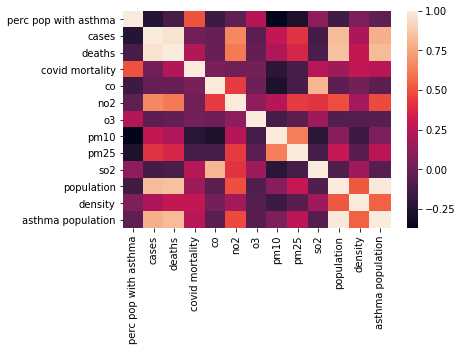

In [41]:
corr = master1.corr()
sns.heatmap(corr);

In [34]:
master1.describe()

,perc pop with asthma,cases,deaths,covid mortality,co,no2,o3,pm10,pm25,so2,population,density,asthma population
count,46.000000,4.600000e+01,46.000000,46.000000,36.000000,36.000000,46.000000,26.000000,46.000000,38.000000,4.600000e+01,46.000000,4.600000e+01
mean,9.845809,1.304860e+05,1968.826087,0.014893,3.425080,7.374480,19.290778,19.156188,33.067281,1.181106,2.400074e+06,1985.456522,2.327599e+07
std,1.058396,1.815652e+05,2839.740859,0.006775,3.190602,3.020863,5.366832,6.604530,6.611993,1.000202,2.511146e+06,1480.957059,2.335632e+07
min,8.508445,1.214000e+03,6.000000,0.004942,0.100000,2.043814,3.273779,10.270619,18.817010,0.157772,1.585090e+05,417.000000,1.495816e+06
25%,8.897829,4.736675e+04,578.250000,0.010876,2.273271,5.994791,17.146798,14.536171,29.206298,0.437295,8.444942e+05,1030.500000,7.375149e+06
50%,9.770068,7.913650e+04,1137.500000,0.014100,2.734576,7.294602,20.666615,17.985865,32.861183,1.413393,1.463898e+06,1505.000000,1.459162e+07
75%,10.694203,1.079318e+05,2104.000000,0.016336,4.049871,9.272597,22.356863,22.257712,35.239717,1.559838,3.434624e+06,2331.250000,3.113573e+07
max,12.239153,1.104843e+06,16332.000000,0.041100,20.435754,19.061954,29.788175,37.219638,56.134367,5.709740,1.275081e+07,7256.000000,1.134545e+08


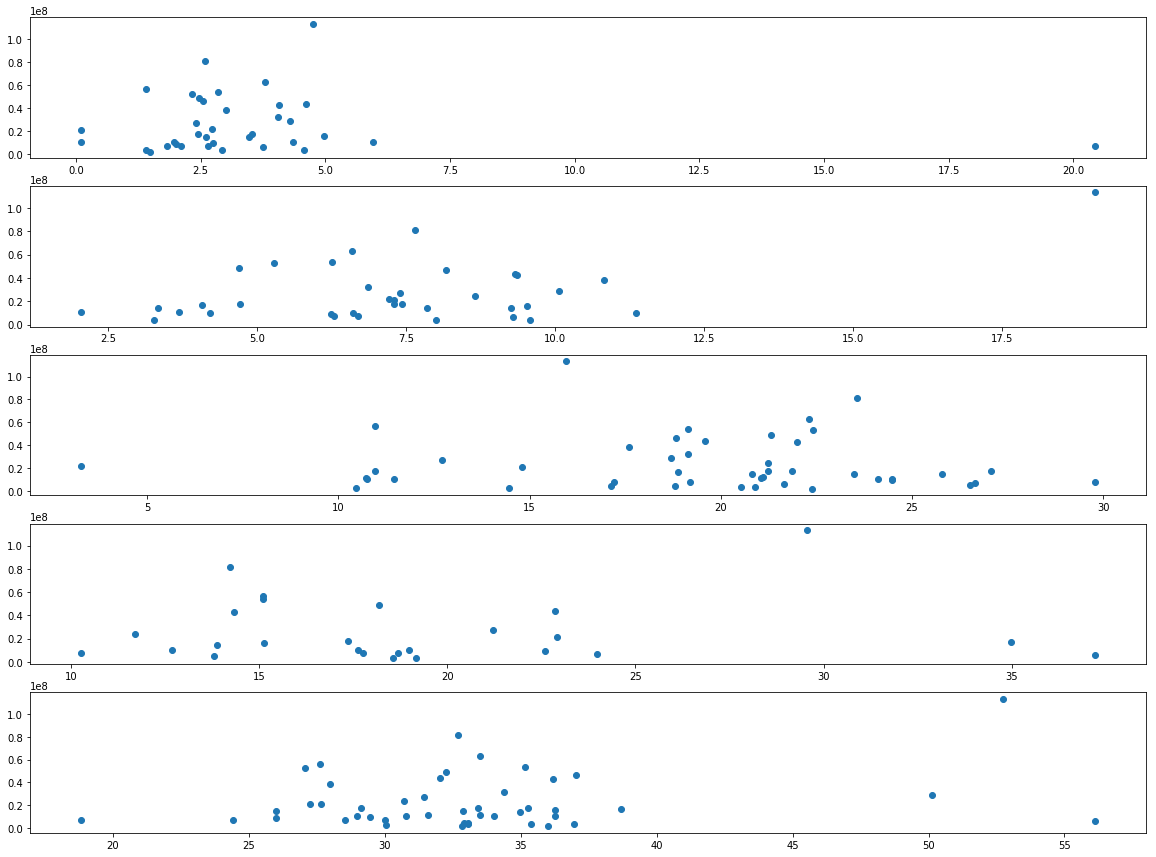

In [49]:
#scatterplot of asthma with aqi pollutants
fig, (ax2, ax3, ax4, ax5, ax6) = plt.subplots(5,figsize= (20,15))
ax2.scatter(master1['co'], master1['asthma population'])
ax3.scatter(master1['no2'], master1['asthma population'])
ax4.scatter(master1['o3'], master1['asthma population'])
ax5.scatter(master1['pm10'], master1['asthma population'])
ax6.scatter(master1['pm25'], master1['asthma population']);

In [50]:
master1.corr()

,perc pop with asthma,cases,deaths,covid mortality,co,no2,o3,pm10,pm25,so2,population,density,asthma population
perc pop with asthma,1.000000,-0.233740,-0.113895,0.502000,-0.149435,-0.035586,0.241928,-0.371394,-0.269216,0.124566,-0.136416,0.065912,-0.029653
cases,-0.233740,1.000000,0.966990,0.021221,-0.010486,0.660731,-0.039982,0.284528,0.415357,-0.119704,0.831008,0.215304,0.788072
deaths,-0.113895,0.966990,1.000000,0.228715,-0.004930,0.618692,-0.022390,0.225229,0.364359,-0.097872,0.848912,0.287417,0.828467
covid mortality,0.502000,0.021221,0.228715,1.000000,0.057151,0.020268,0.032387,-0.215221,-0.106658,0.246184,0.171447,0.282530,0.250401
co,-0.149435,-0.010486,-0.004930,0.057151,1.000000,0.441107,0.012512,-0.265008,-0.108552,0.809761,-0.043464,0.040739,-0.048852
no2,-0.035586,0.660731,0.618692,0.020268,0.441107,1.000000,0.123787,0.233967,0.437807,0.412449,0.495021,0.189423,0.480838
o3,0.241928,-0.039982,-0.022390,0.032387,0.012512,0.123787,1.000000,-0.118732,-0.041196,0.170206,-0.080015,-0.067734,-0.052218
pm10,-0.371394,0.284528,0.225229,-0.215221,-0.265008,0.233967,-0.118732,1.000000,0.635479,-0.220220,0.095722,-0.154298,0.063994
pm25,-0.269216,0.415357,0.364359,-0.106658,-0.108552,0.437807,-0.041196,0.635479,1.000000,-0.115511,0.291661,-0.056511,0.257281
so2,0.124566,-0.119704,-0.097872,0.246184,0.809761,0.412449,0.170206,-0.220220,-0.115511,1.000000,-0.081866,0.173432,-0.061688


In [ ]:
t_test = stats.ttest_1samp(master1['o3'], )

In [94]:
co = master1['co']
no2 = master1['no2']
o3 = master1['o3']
pm10=master1['pm10']
pm25=master1['pm25']
so2=master1['so2']
asthma_population = master1['asthma population']

In [36]:

!pip install bioinfokit
from bioinfokit.analys import stat


    100% |████████████████████████████████| 81kB 329kB/s ta 0:00:01
  Running setup.py bdist_wheel for bioinfokit ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/f6/30/5d/d4b0f14ae4b00b527e9aa715c54c393fc999897cb0a5673bf3
  Running setup.py bdist_wheel for matplotlib-venn ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/c5/9c/ac/77b0c9151c4c264bec6ba18120d73bb24df5b4c1f09c17a41c
  Running setup.py bdist_wheel for adjustText ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built bioinfokit matplotlib-venn adjustText


In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
model = old()

Ideas on kernel death:
1. if joining by state, different cities will be joined together? --> refine to match by city or county instead of state probably by county

2.  5.62 GiB for array with shape 753807573


# Analysis

In [38]:
"""
For analysis, we should find the top ten or twenty areas of worst air quality in the U.S. 
and see if there is a correlation between the coronavirus mortality

another comparing the aqi to asthma rates to see correlation

then asthma to coronavirus mortality

Then we could see top ten or twenty areas with the most significant coronavirus mortality and cross it with the aqi stacked by pollutant like in the Chicago case study, then do chi square on the variables
"""

#chose top and bottom cities based on the first occurence starting from top of the list and bottom of the list
#ozone is worse in hot weather, we noticed a trend in summer months

# x = AQI_big6df[AQI_big6df['Specie'] == 'o3'].sort_values(by = 'median', ascending = False)
# x = x.groupby('City').min()['median'].sort_values()
# x
top_5_cities_o3 = ['Chicago, Illinois', 'Milwaukee, Wisconsin', 'Madison, ', 'San Diego', 'Albuquerque','Tucson','Indianapolis','Columbus','Las Vegas','Dallas']
bottom_5_cities_o3 = ['Sacramento', 'Portland','Salem','New York','Los Angeles','Little Rock','Seattle','Nashville','Milwaukee','Denver']

In [39]:
x = master1[master1['City']]

KeyError: 'City'

# Multiple Linear Regression Model: 
1:10 Ratio --> We plan to clean and remerge the master by taking the mean of each month for each city to give us more rows

If it doesn't work
**Asthma relationship to air pollution**
1st Try

Independent Variables: PM10, PM25, NO2,
Dependent Variable: asthma


2nd Try

Independent Variables: SO2, CO, O3
Dependent Variable: asthma 

# Linear Regression
**Asthma to Covid Mort**
Independent Variable: Perc. Pop of Asthma 
Dependent Variables: Covid Mortality

**Asthma Population to Covid Deaths**
Independent Variable: Asthma Population
Dependent Variable: Covid Deaths



In [51]:
#presplit our dataset
X2 = master1[['pm10','pm25','no2']]
y2 = master1['asthma population']

In [52]:
#splitting dataset into 30% test and 70% train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [53]:
#training our model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
#prediction of the test dataset
y_prediction = regressor.predict(X_test)

In [139]:
#linear regression of covid asthma pop perc. and covid mort
#presplit our dataset
X = np.array(covid_asthma['perc pop with asthma']).reshape(-1,1)

y = covid_asthma['covid mortality']

In [140]:
#splitting dataset into 30% test and 70% train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [141]:
#training our model
regressor2 = LinearRegression()
regressor2.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# HistAQI


In [42]:
histAQI = pd.read_excel('airqualitytrendsbycity1990-2019.xlsx')
histAQI.head()

FileNotFoundError: [Errno 2] No such file or directory: 'airqualitytrendsbycity1990-2019.xlsx'

In [ ]:
histAQI_Year_column = pd.melt(histAQI, id_vars=(['Pollutant','StateAbbr','Trend Statistic']), value_vars=([1990,
                                1991,                          1992,
                                1993,                          1994,
                                1995,                          1996,
                                1997,                          1998,
                                1999,                          2000,
                                2001,                          2002,
                                2003,                          2004,
                                2005,                          2006,
                                2007,                          2008,
                                2009,                          2010,
                                2011,                          2012,
                                2013,                          2014,
                                2015,                          2016,
                                2017,                          2018,
                                2019]), var_name='Year', value_name='Pollutant Value').dropna()
histAQI_Year_column.head()

In [ ]:
cities = histAQI['Core Based Statistical Area']
y = [str(i).split() for i in cities]

states = []
for i in y:
    state = i[-1]
    states.append(state)
histAQI['StateAbbr'] = states

In [ ]:
histAQI.head()

In [ ]:
histAQI_asthma= histAQI_asthma[histAQI_asthma.StateAbbr != 'US']

In [ ]:
histAQI_asthma

In [ ]:
#copied code to fill in values from histAQI_asthma
sns.lineplot(x = "Year", y = "Pollutant Value", data = histAQI_Year_column)
plt.title('Total Pollutant Values over Time')
plt.show()

In [ ]:
sns.lineplot(x = "Year", y = "Pollutant Value", data = histAQI_Year_column)
plt.title('Total Pollutant Values over Time')
plt.show()

In [ ]:
sns.lineplot(x = "Year", y = "Pollutant Value", data = histAQI_Year_column, hue = "Pollutant")
plt.title('Pollutant Values over Time')
plt.show()

# Merge AQI and Asthma

In [ ]:
#append adds rows
# histAQI_asthma = histAQI_Year_column.append(asthma_premerge)

#merge combines
AQI_asthma = pd.merge(asthma1,AQI_big6df,
    how="left",                      
    left_on = ['state'],
    right_on = ['state'])                        
AQI_asthma


# Demographics


In [ ]:
demographics_data = pd.read_csv("https://data.cdc.gov/resource/vbim-akqf.csv")

In [ ]:
demographics_data.groupby('race_ethnicity_combined').size()


In [ ]:
demographics_data.describe()